In [32]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,plot_roc_curve
import warnings
warnings.filterwarnings('ignore')

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Inayat\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [2]:
ds = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
ds

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
ds.shape

(1599, 12)

In [4]:
ds.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
ds.columns = ds.columns.str.replace(' ', '_')
ds.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [7]:
ds.isnull().sum()     #no Missing Values

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

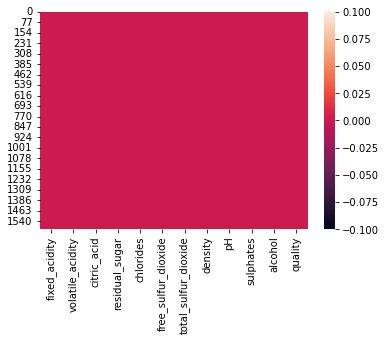

In [8]:
sns.heatmap(ds.isnull())

In [9]:
ds.duplicated().sum()

240

<AxesSubplot:xlabel='fixed_acidity', ylabel='Density'>

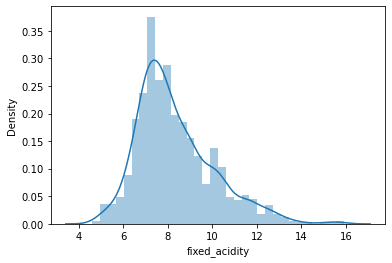

In [10]:
 sns.distplot(ds['fixed_acidity'])

<AxesSubplot:xlabel='volatile_acidity', ylabel='Density'>

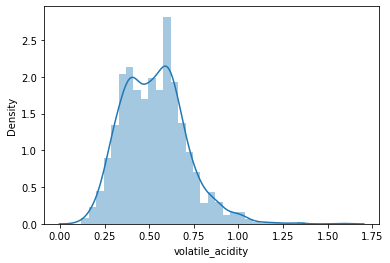

In [11]:
 sns.distplot(ds['volatile_acidity'])

<AxesSubplot:xlabel='citric_acid', ylabel='Density'>

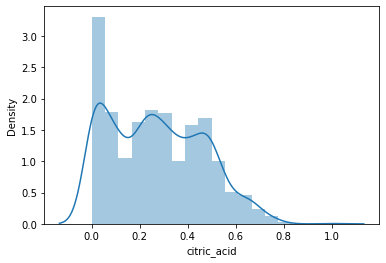

In [12]:
 sns.distplot(ds['citric_acid'])

In [13]:
ds.quality.value_counts(sort=False)

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

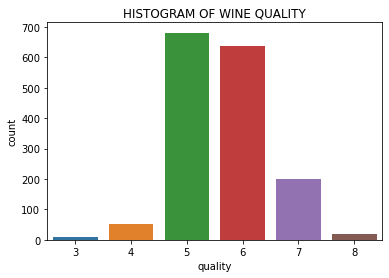

In [14]:
plt = sns.countplot(x='quality',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:xlabel='quality', ylabel='fixed_acidity'>

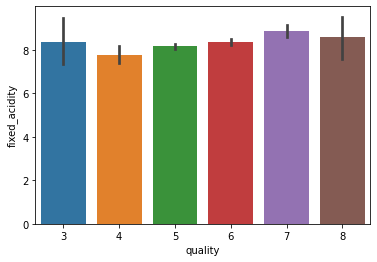

In [15]:
sns.barplot(x='quality',y='fixed_acidity',data=ds)
#fixed_acidity doesnot have impact on quality of wine

<AxesSubplot:xlabel='quality', ylabel='volatile_acidity'>

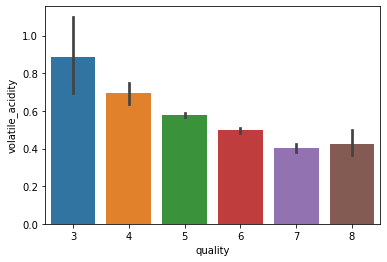

In [16]:
sns.barplot(x='quality',y='volatile_acidity',data=ds)
#Volatile acidity has negative relation with quality.

<AxesSubplot:xlabel='quality', ylabel='citric_acid'>

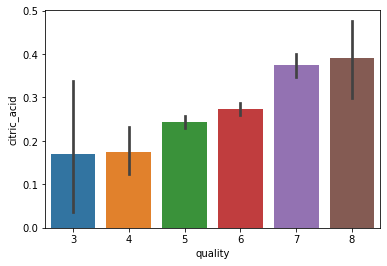

In [17]:
sns.barplot(x='quality',y='citric_acid',data=ds)
#citric acid has positive relation with quality.

<AxesSubplot:xlabel='quality', ylabel='residual_sugar'>

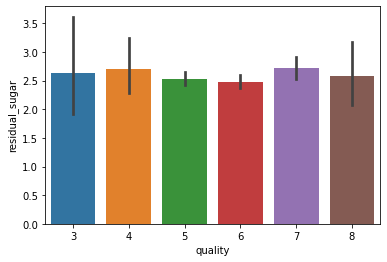

In [18]:
sns.barplot(x='quality',y='residual_sugar',data=ds)
#Residual sugar have no impact on the quality of wine

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

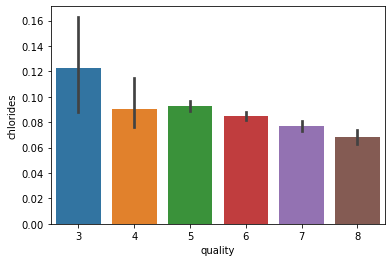

In [19]:
sns.barplot(x='quality',y='chlorides',data=ds)
#Increase in chlorides will decrease the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='free_sulfur_dioxide'>

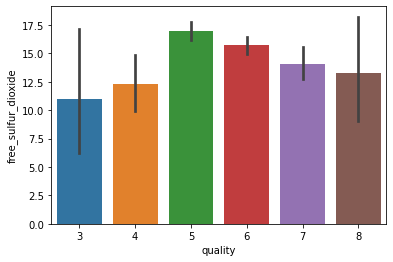

In [20]:
sns.barplot(x='quality',y='free_sulfur_dioxide',data=ds)
#free sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='total_sulfur_dioxide'>

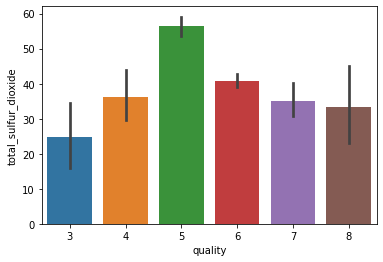

In [21]:
sns.barplot(x='quality',y='total_sulfur_dioxide',data=ds)
#total sulphur dioxide has positive relation with the quality.

<AxesSubplot:xlabel='quality', ylabel='density'>

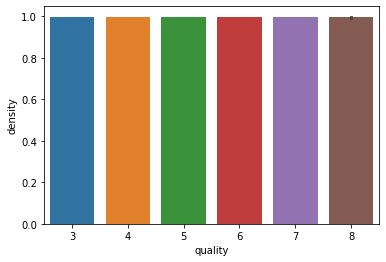

In [22]:
sns.barplot(x='quality',y='density',data=ds)
#Density has no corelation with quality

<AxesSubplot:xlabel='quality', ylabel='pH'>

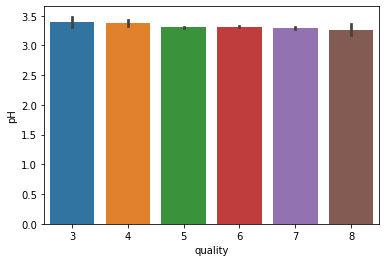

In [23]:
sns.barplot(x='quality',y='pH',data=ds)
#PH no corealtion with quality

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

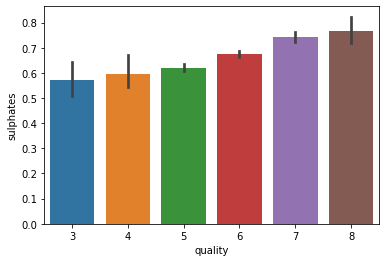

In [24]:
sns.barplot(x='quality',y='sulphates',data=ds)
#sulphate increases quality of wine

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

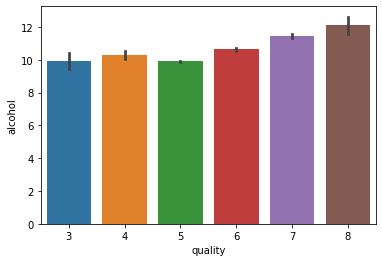

In [25]:
sns.barplot(x='quality',y='alcohol',data=ds)
#ncrease in alcohol quality will improve.

In [26]:
ds_quality = {3:'bad', 4:'bad',5:'bad',6:'bad',7:'good',8:'good'}
ds['quality2'] = ds.quality.map(ds_quality)
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [27]:
le = LabelEncoder()
ds['quality2']=le.fit_transform(ds['quality2'])
ds

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,quality2
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


[Text(0.5, 1.0, 'HISTOGRAM OF WINE QUALITY'),
 Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'count')]

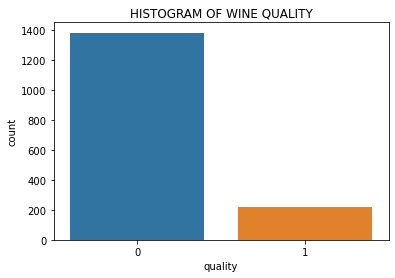

In [28]:
plt = sns.countplot(x='quality2',data=ds)
plt.set(title='HISTOGRAM OF WINE QUALITY',xlabel='quality',ylabel='count')

<AxesSubplot:>

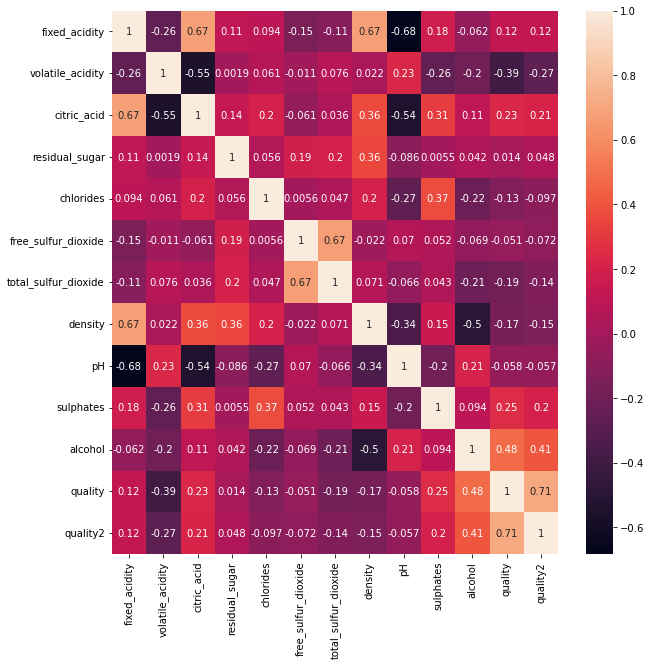

In [29]:
from matplotlib import pyplot as plt
plt.figure(figsize = (10,10))
sns.heatmap(ds.corr(),color ='k',annot=True)

In [30]:
dszscore=np.abs(zscore(ds))

NameError: name 'zscore' is not defined

In [ ]:
print(np.where(dszscore>3))

In [ ]:
dsnew=ds[(dszscore<3).all(axis=1)]
print('dfnew.shape=',dsnew.shape)
ds=dsnew

In [ ]:
ds.corr()

In [ ]:
ds.skew()

In [ ]:
from sklearn.preprocessing import power_transform
x_new = power_transform(ds)

In [ ]:
ds=pd.DataFrame(x_new ,columns = ds.columns)
ds

In [ ]:
ds.skew()

In [ ]:
x = ds.drop (['quality'], axis = 1)

In [ ]:
x = ds.drop (['citric_acid'], axis = 1)

In [ ]:
#to check if skweness is lying between -0.5 to 0.5
ds.skew()[np.abs(ds.skew()) < 0.5].all()

In [ ]:
x=ds.iloc[:,0:-1]
x

In [ ]:
y=ds.iloc[:,-1]
y

In [ ]:
le = LabelEncoder()
y=le.fit_transform(y)
y

In [ ]:
x.shape

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [ ]:
x_train

In [ ]:
y_test

In [ ]:
x_test

In [ ]:
y_train

In [ ]:
scale=StandardScaler()
x=scale.fit_transform(x)
x

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=587)

In [ ]:
from sklearn.metrics import accuracy_score,plot_roc_curve

In [ ]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()

model=[lg,gnb,svc,dtc,knn]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("Accuracy_score:",m,'is')
    
    print(accuracy_score(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')